<a href="https://colab.research.google.com/github/Raninth/Titanic_survival_predection-/blob/main/Titanic_Logreg%2C_Knn%2C_Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(transform_output='pandas')

In [170]:
# Load the data
train_data = pd.read_csv('/content/drive/MyDrive/ML PRACTICES/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ML PRACTICES/test.csv')

In [171]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [173]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [174]:
# check for null values
train_data.isna().sum().sum()

866

In [175]:
# Drop unnecessary columns
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop([ 'Name', 'Ticket', 'Cabin'], axis=1)

In [176]:
test_data.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [177]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [178]:

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [179]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [180]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [181]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [111]:
train_data.duplicated().sum()

111

In [112]:
#check for inconsistencies
data_types = train_data.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Sex', 'Embarked'], dtype='object')

In [113]:
for col in str_cols:
    print(f'- {col}:')
    print(train_data[col].value_counts(dropna=False))
    print("\n\n")

- Sex:
Sex
male      577
female    314
Name: count, dtype: int64



- Embarked:
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64





In [114]:
train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [115]:
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

In [116]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [117]:
# Checking balance
y_train.value_counts(normalize=True)

Survived
0    0.621257
1    0.378743
Name: proportion, dtype: float64

In [118]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
imputer = SimpleImputer(strategy='most_frequent')
ohe_pipe = make_pipeline(imputer, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

OneHotEncoder Columns: Index(['Sex', 'Embarked'], dtype='object')


In [119]:
# Numerical Prepprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [120]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple], verbose_feature_names_out=False)

In [121]:
# Make an instance of the model with default parameters
logreg = LogisticRegression(max_iter=500, random_state=42)

# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Embarked'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       415
           1       0.76      0.69      0.72       253

    accuracy                           0.80       668
   macro avg       0.79      0.78      0.78       668
weighted avg       0.80      0.80      0.80       668



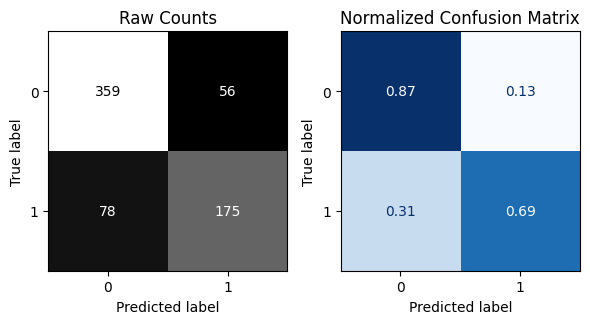


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       134
           1       0.77      0.73      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



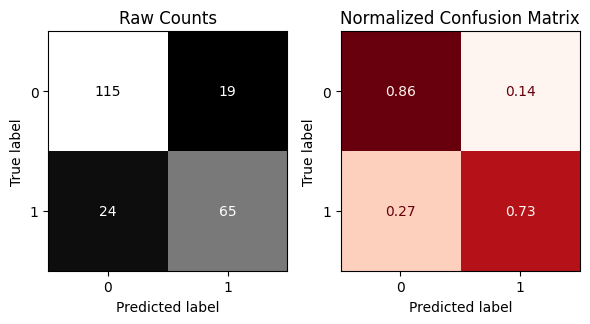

In [123]:
# Evaluate the default model
evaluate_classification(logreg_pipe, X_train, y_train, X_test, y_test)

In [124]:
params = logreg_pipe.get_params()
params

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                         

In [125]:
# Remaking the model with solver='liblinear'
logreg_pipe = make_pipeline(preprocessor, LogisticRegression(solver='liblinear',
                                                       max_iter=500,
                                                       penalty='l1',
                                                       random_state=42))
# Define the param grid
params={'logisticregression__C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 10000], 'logisticregression__class_weight': [None, 'balanced']}
# Create the GridSearchCV object with required args
gs = GridSearchCV(logreg_pipe, params, verbose=True, n_jobs=-1,
                  return_train_score=True,scoring='recall_macro')
# Fit the gridsearch and display best params
gs.fit(X_train, y_train)
print(f'Best Params: {gs.best_params_}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Params: {'logisticregression__C': 0.1, 'logisticregression__class_weight': None}


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       415
           1       0.77      0.68      0.72       253

    accuracy                           0.80       668
   macro avg       0.79      0.78      0.78       668
weighted avg       0.80      0.80      0.80       668



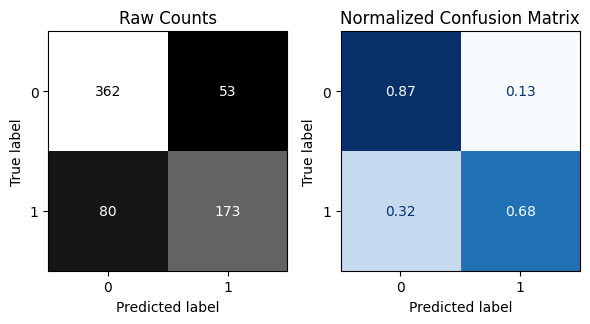


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       134
           1       0.74      0.71      0.72        89

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



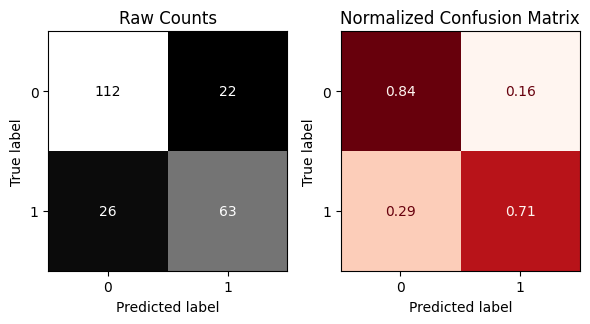

In [126]:
evaluate_classification(gs.best_estimator_, X_train, y_train, X_test, y_test)

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

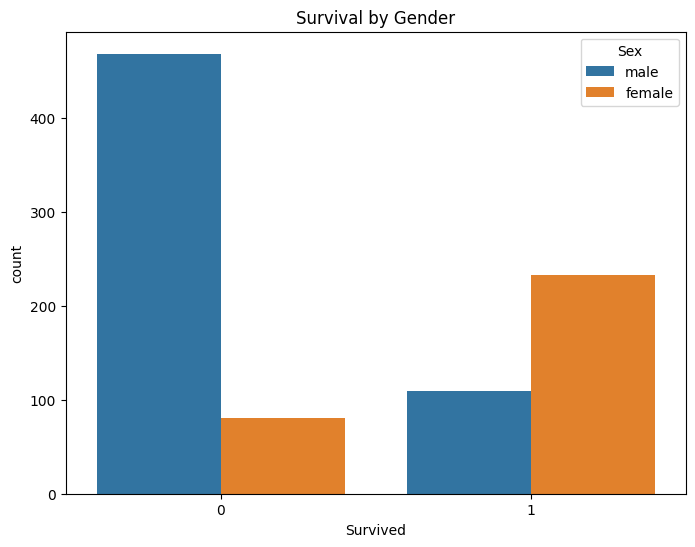

In [128]:
# Distribution of survival by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival by Gender')
plt.show()

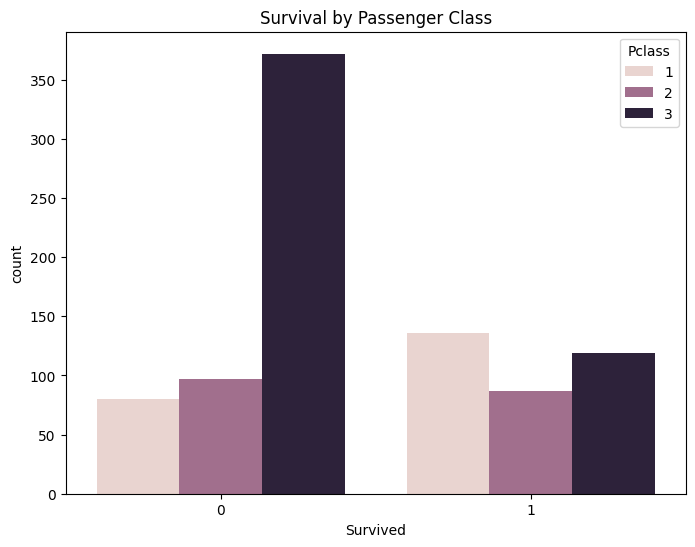

In [129]:
# Distribution of survival by passenger class
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival by Passenger Class')
plt.show()

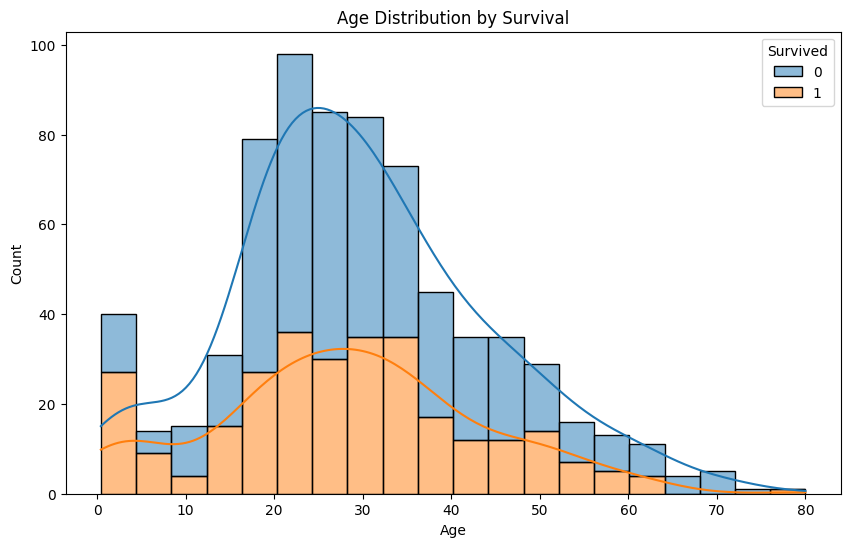

In [130]:
 #Age distribution for survived vs not survived
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

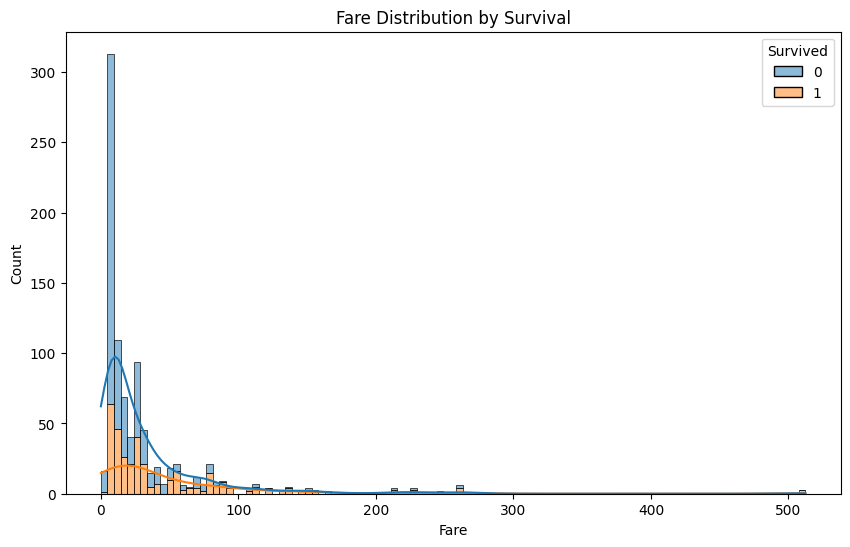

In [131]:
# Fare distribution for survived vs not survived
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Fare Distribution by Survival')
plt.show()

#KNN

In [132]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate default KNN
knn = KNeighborsClassifier()

In [133]:
# Define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Embarked'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       415
           1       0.83      0.78      0.80       253

    accuracy                           0.86       668
   macro avg       0.85      0.84      0.85       668
weighted avg       0.86      0.86      0.86       668



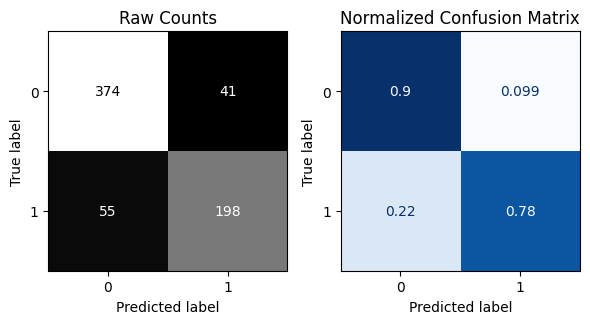


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       134
           1       0.78      0.74      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



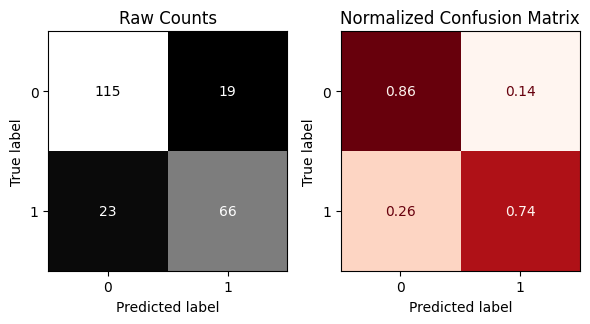

In [134]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

In [135]:
# Get list of params for the knn model pipeline
knn_pipe.get_params()



{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                         

In [136]:
nneighbors_list = list(range(1,52,2))
nneighbors_list

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51]

In [137]:
from sklearn.model_selection import GridSearchCV
params = {'kneighborsclassifier__n_neighbors': nneighbors_list, 'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
gs = GridSearchCV(knn_pipe, params, verbose=True, n_jobs=-1, return_train_score=True, scoring='recall_macro')
gs.fit(X_train, y_train)
gs.best_params_



Fitting 5 folds for each of 104 candidates, totalling 520 fits


{'kneighborsclassifier__algorithm': 'brute',
 'kneighborsclassifier__n_neighbors': 21}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       415
           1       0.84      0.68      0.75       253

    accuracy                           0.83       668
   macro avg       0.83      0.80      0.81       668
weighted avg       0.83      0.83      0.83       668



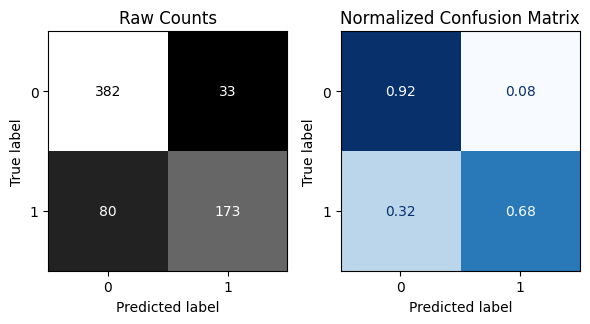


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       134
           1       0.82      0.71      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



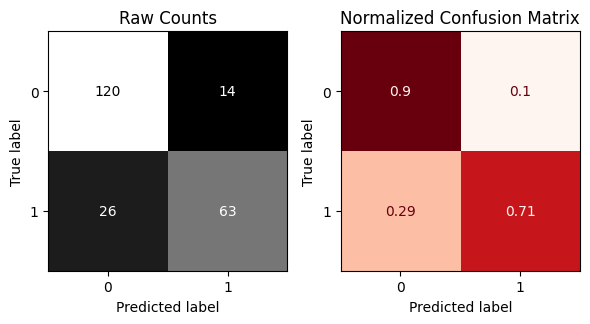

In [138]:
# Obtain complete evaluation for best performing model (k = 21)
evaluate_classification(gs.best_estimator_, X_train, y_train, X_test, y_test)

In [139]:
best_model = gs.best_estimator_


#Random forest Classifier

In [140]:
# Instantiate a Default Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)


In [141]:
rf_pipe =  make_pipeline(preprocessor, rf)
# Fit the model on the training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Embarked'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       415
           1       0.99      0.96      0.97       253

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



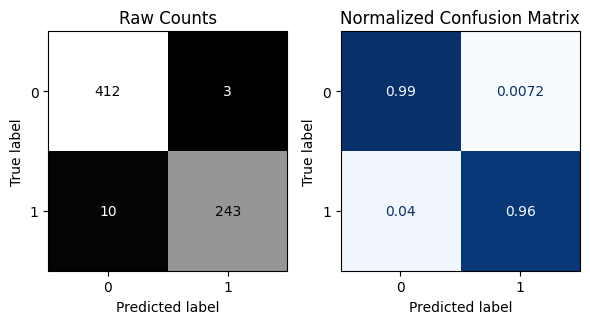


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       134
           1       0.72      0.73      0.73        89

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



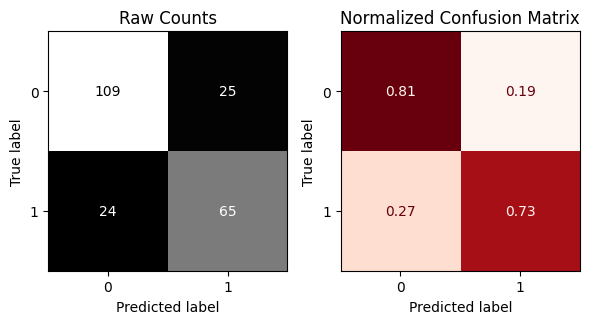

In [142]:
evaluate_classification(rf_pipe, X_train, y_train, X_test, y_test)

In [143]:
rf_pipe.get_params()


{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                         

In [144]:
# Define param grid with options to try
params = {'randomforestclassifier__max_depth': [None,10,15,20],
          'randomforestclassifier__n_estimators':[10,100,150,200],
          'randomforestclassifier__min_samples_leaf':[1,2,3,4],
          'randomforestclassifier__max_features':['sqrt','log2',None],
          'randomforestclassifier__oob_score':[True,False],
          }

In [145]:
gs = GridSearchCV(rf_pipe, params, verbose=True, n_jobs=-1, return_train_score=True, scoring='recall_macro')
gs.fit(X_train, y_train)
gs.best_params_



Fitting 5 folds for each of 384 candidates, totalling 1920 fits


{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__oob_score': True}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       415
           1       0.93      0.83      0.87       253

    accuracy                           0.91       668
   macro avg       0.91      0.89      0.90       668
weighted avg       0.91      0.91      0.91       668



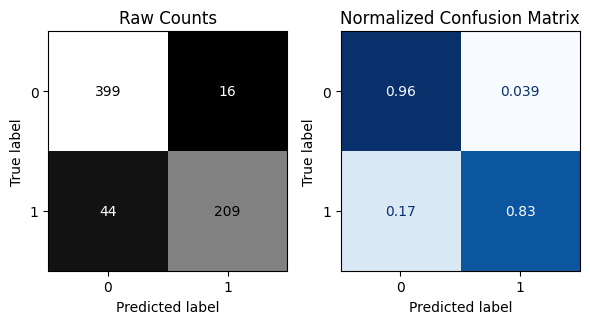


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       134
           1       0.78      0.74      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



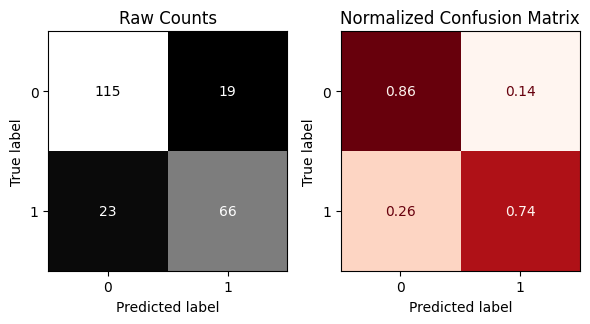

In [146]:
evaluate_classification(gs.best_estimator_, X_train, y_train, X_test, y_test)

In [150]:
#best model

# predections
predictions = best_model.predict(test_data)

In [151]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [183]:
#submission
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)


In [184]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


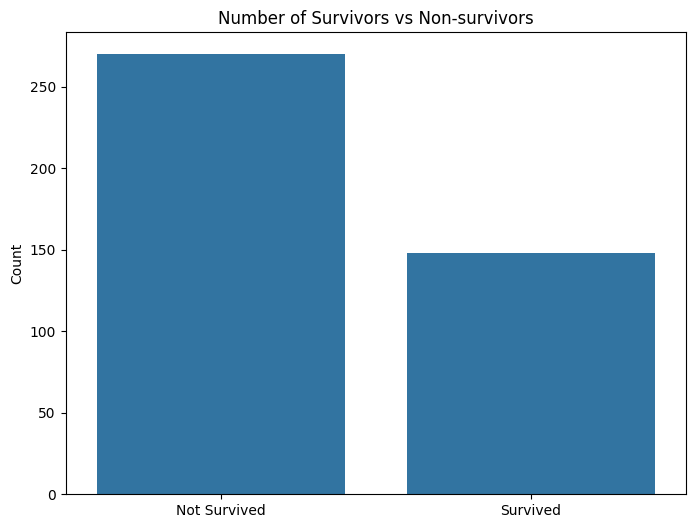

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns



# Count the number of survivors and non-survivors
survival_counts = submission['Survived'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_counts.index, y=survival_counts.values)
plt.title('Number of Survivors vs Non-survivors')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])  # Set labels for x-axis ticks
plt.show()
